### Libraries

In [2]:
# Para instalar yfinance
# !pip install yfinance
# For getting data
import yfinance as yf

# Operating system
import os

# To create final df
import pandas as pd
from glob import glob
import numpy as np

# !pip install pandas-datareader
# from pandas_datareader import data as pdr

#!pip install get-all-tickers
# from get_all_tickers import get_tickers as gt

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Parameters

In [3]:
START_DATE = "2017-01-01"
END_DATE   = "2020-12-31"

###  Yahoo Finance info for each ticker

In [4]:
# Leyendo archivo previamente generado
ticker_yf_data = pd.read_csv('data/all_tickers_yfinance_March2021.csv', index_col = 0)
ticker_yf_data.head()

,zip,sector,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,...,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url
DDD,29730,Technology,"3D Systems Corporation, through its subsidiari...",Rock Hill,803 326 3930,SC,United States,[],http://www.3dsystems.com,1,...,1.613088e+09,15.36,NaN,0.1218,18478842.0,NaN,NaN,NaN,26.40,https://logo.clearbit.com/3dsystems.com
MMM,55144-1000,Industrials,"3M Company develops, manufactures, and markets...",St. Paul,651-733-1110,MN,United States,[],http://www.3m.com,1,...,1.613088e+09,2.52,NaN,0.0158,8139533.0,NaN,NaN,NaN,178.45,https://logo.clearbit.com/3m.com
WBAI,518115,Consumer Cyclical,"500.com Limited, through its subsidiaries, pro...",Shenzhen,86 755 8835 2500,NaN,China,[],http://www.500.com,1,...,1.613088e+09,NaN,NaN,NaN,2445891.0,NaN,NaN,NaN,19.48,https://logo.clearbit.com/500.com
EGHT,95008,Technology,"8x8, Inc. provides voice, video, chat, contact...",Campbell,408-727-1885,CA,United States,[],http://www.8x8.com,1,...,1.613088e+09,3.88,NaN,0.2138,20208760.0,NaN,NaN,NaN,33.42,https://logo.clearbit.com/8x8.com
AOS,53224-9508,Industrials,A. O. Smith Corporation manufactures and marke...,Milwaukee,414 359 4000,WI,United States,[],http://www.aosmith.com,1,...,1.613088e+09,2.86,NaN,0.0341,3903000.0,161468000.0,NaN,NaN,61.73,https://logo.clearbit.com/aosmith.com


In [6]:
ticker_yf_data[['previousClose','fiftyDayAverage']].head()

,previousClose,fiftyDayAverage
DDD,25.63,39.257057
MMM,177.63,176.035890
WBAI,19.00,17.928530
EGHT,32.92,35.466175
AOS,61.04,58.848530


### Cleaning and filtering data

In [7]:
relevant_cols = ['shortName', 'marketCap', 'previousClose', 'fiftyDayAverage', 'averageVolume', 'sharesOutstanding',
                 'sector', 'industry', 'country'] 

ticker_yf_data = ticker_yf_data[relevant_cols]

In [8]:
# Dejando marketCap en millones
ticker_yf_data.rename(columns = {'marketCap': 'marketCap_mill'}, inplace = True)

ticker_yf_data['marketCap_mill']  = ticker_yf_data['marketCap_mill'] / 1000000

In [9]:
ticker_yf_data.head()

,shortName,marketCap_mill,previousClose,fiftyDayAverage,averageVolume,sharesOutstanding,sector,industry,country
DDD,3D Systems Corporation,3072.267008,25.63,39.257057,13306665,124132000.0,Technology,Computer Hardware,United States
MMM,3M Company,104701.288448,177.63,176.035890,2679826,577750016.0,Industrials,Specialty Industrial Machinery,United States
WBAI,500.com Limited,880.041856,19.00,17.928530,1854041,43012800.0,Consumer Cyclical,Gambling,China
EGHT,8x8 Inc,3537.364224,32.92,35.466175,2244725,107486000.0,Technology,Software—Application,United States
AOS,A.O. Smith Corporation,10108.139520,61.04,58.848530,1140150,135430000.0,Industrials,Specialty Industrial Machinery,United States


## Market cap filtering

- `fiftyDayAverage`: \$ 10
- `fiftyDayAverage`: \$ 250
- `averageVolume`: 500,000
- `marketCap_mill`: 500 (millones)

In [10]:
PRECIO_MIN = 10
PRECIO_MAX = 400 #  250
VOL_MIN = 500000
MARKETCAP = 500

ticker_yf_data = ticker_yf_data[(ticker_yf_data['fiftyDayAverage'] > PRECIO_MIN) & 
                                (ticker_yf_data['fiftyDayAverage'] < PRECIO_MAX) & 
                                (ticker_yf_data['averageVolume'] > VOL_MIN)      &
                                (ticker_yf_data['marketCap_mill'] > MARKETCAP) ]   

ticker_yf_data.head()

,shortName,marketCap_mill,previousClose,fiftyDayAverage,averageVolume,sharesOutstanding,sector,industry,country
DDD,3D Systems Corporation,3072.267008,25.63,39.257057,13306665,124132000.0,Technology,Computer Hardware,United States
MMM,3M Company,104701.288448,177.63,176.035890,2679826,577750016.0,Industrials,Specialty Industrial Machinery,United States
WBAI,500.com Limited,880.041856,19.00,17.928530,1854041,43012800.0,Consumer Cyclical,Gambling,China
EGHT,8x8 Inc,3537.364224,32.92,35.466175,2244725,107486000.0,Technology,Software—Application,United States
AOS,A.O. Smith Corporation,10108.139520,61.04,58.848530,1140150,135430000.0,Industrials,Specialty Industrial Machinery,United States


In [11]:
ticker_yf_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1676 entries, DDD to MAG
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shortName          1676 non-null   object 
 1   marketCap_mill     1676 non-null   float64
 2   previousClose      1676 non-null   float64
 3   fiftyDayAverage    1676 non-null   float64
 4   averageVolume      1676 non-null   int64  
 5   sharesOutstanding  1661 non-null   float64
 6   sector             1661 non-null   object 
 7   industry           1661 non-null   object 
 8   country            1661 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 130.9+ KB


### Analyzing missing values

In [12]:
ticker_yf_data[ticker_yf_data['sector'].isnull()]

,shortName,marketCap_mill,previousClose,fiftyDayAverage,averageVolume,sharesOutstanding,sector,industry,country
BSX,Boston Scientific Corporation,55997.341696,37.93,37.794117,11113676,NaN,NaN,NaN,NaN
CHL,China Mobile Limited,109593.518080,26.10,28.106000,3778728,NaN,NaN,NaN,NaN
CCC,Clarivate Plc,17536.395264,29.17,28.856667,1411933,NaN,NaN,NaN,NaN
CXO,Concho Resources Inc.,12876.952576,69.80,61.907390,2736019,NaN,NaN,NaN,NaN
RESI,Front Yard Residential Corporat,974.543296,16.23,16.188334,1060974,NaN,NaN,NaN,NaN
GD,General Dynamics Corporation,48813.907968,165.77,159.043230,1451480,NaN,NaN,NaN,NaN
HMI,Huami Corporation American Depo,1058.716992,16.68,15.715555,522490,NaN,NaN,NaN,NaN
LGVW,Longview Acquisition Corp.,1192.837504,22.92,20.508966,3250938,NaN,NaN,NaN,NaN
SBE,Switchback Energy Acquisition C,1209.513344,32.92,36.866943,4041042,NaN,NaN,NaN,NaN
TIF,Tiffany & Co.,16044.431360,131.43,131.285630,1823315,NaN,NaN,NaN,NaN


### Overview

<AxesSubplot:>

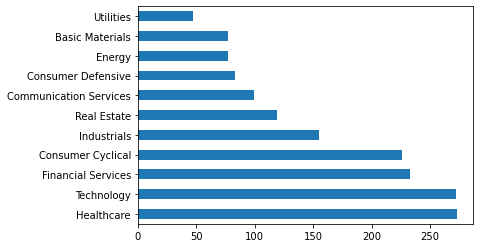

In [13]:
ticker_yf_data['sector'].value_counts().plot.barh()

<AxesSubplot:>

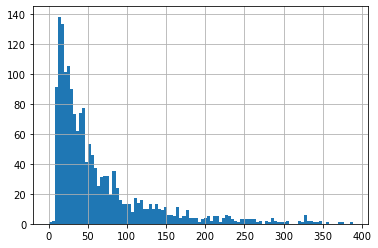

In [14]:
ticker_yf_data['previousClose'].hist(bins = 100)

<AxesSubplot:>

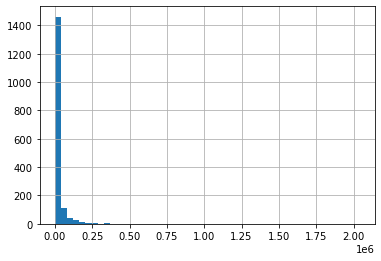

In [15]:
ticker_yf_data['marketCap_mill'].hist(bins = 50)

<AxesSubplot:>

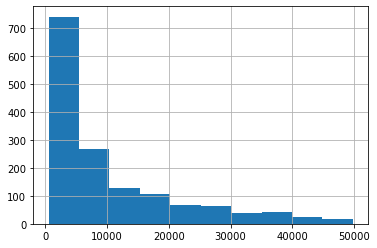

In [16]:
ticker_yf_data[ticker_yf_data['marketCap_mill'] < 50000]['marketCap_mill'].hist(bins = 10)

## Getting EOD prices

In [17]:
symbols = ticker_yf_data.index.to_list()

print('Hay {} símbolos'.format(len(symbols)))

Hay 1676 símbolos


In [18]:
%%time

# Nombre de archivo a crear (o verificar)
filename = 'EOD_yf_' + START_DATE + '_' + END_DATE + '.csv'
dirname = 'data/'

if filename in os.listdir(dirname):
    print('Archivo creado para ese rango de fechas. Cargando...')
    data = pd.read_csv(dirname + filename, header = [0,1], parse_dates = True , index_col = 0)
else:
    print('Descargando datos...')
    data = yf.download(  # or pdr.get_data_yahoo(...
            # tickers list or string as well
            tickers = symbols,

            # use "period" instead of start/end
            # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            # (optional, default is '1mo')
           # period = "6m",

            start = START_DATE, 
            end = END_DATE,

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = '1d',

            # group by ticker (to access via data['SPY'])
            # (optional, default is 'column')
            group_by = 'ticker',

            # adjust all OHLC automatically
            # (optional, default is False)
            auto_adjust = True,

            # download pre/post regular market hours data
            # (optional, default is False)
            #prepost = True,

            # use threads for mass downloading? (True/False/Integer)
            # (optional, default is True)
            threads = True,

            # proxy URL scheme use use when downloading?
            # (optional, default is None)
            proxy = None
        )
    # Se guarda archivo
    data.to_csv(dirname + filename)

data.head()

Archivo creado para ese rango de fechas. Cargando...
Wall time: 3.4 s


PAYA                             CHRS                        \
           Open High Low Close Volume       Open       High        Low   
Date                                                                     
2017-01-03  NaN  NaN NaN   NaN    NaN  28.549999  28.650000  27.450001   
2017-01-04  NaN  NaN NaN   NaN    NaN  28.100000  29.200001  28.049999   
2017-01-05  NaN  NaN NaN   NaN    NaN  29.000000  29.590000  27.750000   
2017-01-06  NaN  NaN NaN   NaN    NaN  27.900000  28.549999  27.750000   
2017-01-09  NaN  NaN NaN   NaN    NaN  28.000000  28.350000  27.475000   

                                 ...  CSTM                               \
                Close    Volume  ...  Open  High   Low Close     Volume   
Date                             ...                                      
2017-01-03  28.000000  231000.0  ...  6.00  6.18  5.90   6.1  2248100.0   
2017-01-04  29.049999  360000.0  ...  6.20  6.30  6.15   6.3   727800.0   
2017-01-05  28.000000  299400.0  ...  6.30  6.35  6.15   6.3   369500.0   
2017-01-06  27.900000  154900.0  ...  6.35  6.38  6.25   6.3   200300.0   
2017-01-09  27.650000  386400.0  ...  6.30  6.30  6.15   6.2   359300.0   

                 CLGX                                              
                 Open       High        Low      Close     Volume  
Date                                                               
2017-01-03  36.065540  36.221964  35.870009  36.212189   467500.0  
2017-01-04  36.368613  36.867213  36.270846  36.446823   493200.0  
2017-01-05  36.525039  36.710791  35.928671  35.938446   498200.0  
2017-01-06  35.948222  36.026432  34.960792  35.909115  1256600.0  
2017-01-09  35.566942  35.811355  35.019456  35.175880   756000.0  

[5 rows x 7756 columns]

In [19]:
init_shape = data.shape

## Missing values

<AxesSubplot:xlabel='None-None', ylabel='Date'>

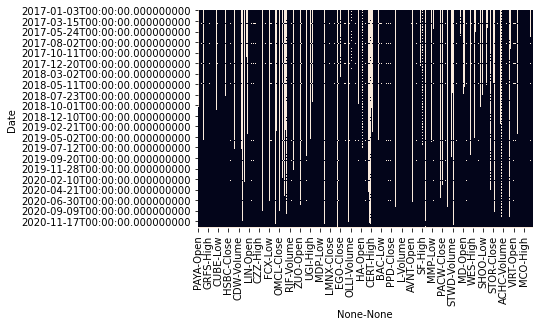

In [20]:
# Visualización rápida
sns.heatmap(data.isnull(), cbar = False)

In [21]:
data.dropna(axis = 0, how = 'all', inplace = True)

In [22]:
mid_shape = data.shape
print('Se eliminaron {} renglones'.format(init_shape[0] - mid_shape[0]))

Se eliminaron 5 renglones


In [23]:
mid_shape = data.shape
data.dropna(axis = 1, how = 'any', inplace = True)
print('Se eliminaron {} columnas'.format(mid_shape[1] - data.shape[1]))

# New list of symbols
symbols = [x[0] for x in data.columns if x[1] == 'Close']

Se eliminaron 1656 columnas


<AxesSubplot:xlabel='None-None', ylabel='Date'>

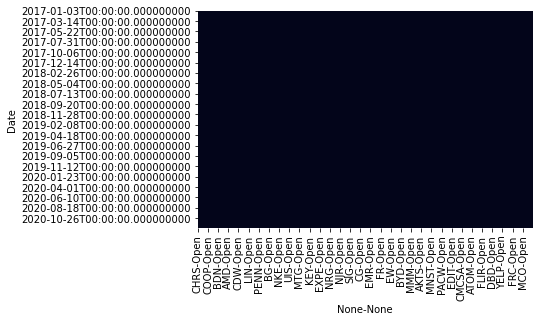

In [24]:
sns.heatmap(data.isnull(), cbar = False)

## Performance metrics

In [28]:
# (sólo una vez, aquí o en consola)
#!pip install quandl  
import quandl

quandl.ApiConfig.api_key = "RaSPcJJ7iE_b57gAYNBm"

In [29]:
CETES = quandl.get('BDM/SF45473', start_date=START_DATE, end_date=END_DATE) 
CETES.head()

,Value
Date,
2017-01-02,6.368505
2017-01-03,6.551327
2017-01-04,6.576502
2017-01-05,6.754070
2017-01-06,6.770243


In [30]:
CETES.mean()

Value    7.034462
dtype: float64

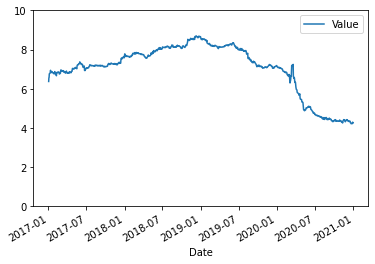

In [31]:
CETES.plot(ylim=(0,10));

#### Close prices Dataframe 

In [32]:
# Symbols Close list:
symbols_close = list(zip(symbols, ['Close'] * len(symbols)))

data_eod = data[symbols_close].droplevel(1, axis = 1)

# Se guarda archivo
data_eod.to_csv(dirname + 'Close_' + START_DATE + '_' + END_DATE + '.csv')

data_eod.head()

,CHRS,FWONK,FIVN,MIK,GIL,JCI,URI,SSRM,ELF,VER,...,IVZ,HBI,HPP,AMBA,AL,RHP,PCAR,COUP,CSTM,CLGX
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,28.000000,31.500000,14.19,20.650000,24.089220,38.050629,109.309998,9.456537,28.940001,32.634785,...,24.584526,18.916697,30.615595,52.540001,33.151562,53.766682,55.781384,24.620001,6.1,36.212189
2017-01-04,29.049999,31.790001,14.20,21.219999,24.507172,38.104435,109.870003,9.546220,28.990000,33.476486,...,25.252197,19.327183,30.992382,53.619999,33.877586,53.198662,56.549965,24.510000,6.3,36.446823
2017-01-05,28.000000,32.119999,14.34,20.840000,24.393185,37.611210,110.150002,10.413152,28.950001,34.165138,...,25.053486,19.335733,30.887228,56.340000,33.971874,51.308102,55.627682,24.080000,6.3,35.938446
2017-01-06,27.900000,31.650000,14.78,20.590000,24.136713,38.373466,109.379997,9.795339,29.639999,33.744289,...,25.061438,19.207457,30.878475,54.619999,33.509865,51.274189,56.259609,24.129999,6.3,35.909115
2017-01-09,27.650000,30.660000,15.64,20.600000,23.994232,38.203083,106.160004,10.054421,29.059999,33.514732,...,24.520941,19.002213,30.405302,53.770000,32.746132,51.799812,55.567902,23.910000,6.2,35.175880


In [33]:
data_eod.tail()

,CHRS,FWONK,FIVN,MIK,GIL,JCI,URI,SSRM,ELF,VER,...,IVZ,HBI,HPP,AMBA,AL,RHP,PCAR,COUP,CSTM,CLGX
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,17.080000,41.220001,179.990005,11.660,28.030001,45.919998,230.929993,19.361488,23.690001,36.937664,...,17.429581,14.606357,23.840000,93.360001,42.779999,64.849998,84.808067,352.160004,13.64,76.974358
2020-12-24,17.350000,41.669998,180.039993,11.450,28.219999,45.930000,232.619995,19.471102,23.340000,37.195004,...,17.489170,14.467532,23.879999,92.570000,43.189999,65.400002,85.824692,356.739990,13.63,77.193489
2020-12-28,16.799999,43.139999,176.160004,11.685,27.750000,46.110001,226.990005,19.381418,23.459999,37.373154,...,17.081984,14.487364,24.020000,95.410004,43.320000,67.010002,85.296448,343.109985,13.66,76.287086
2020-12-29,17.209999,43.220001,173.500000,12.000,27.950001,45.900002,226.429993,19.570747,23.209999,37.195004,...,16.893288,14.318791,23.490000,89.330002,43.340000,66.320000,85.037308,340.489990,13.37,76.018158
2020-12-30,17.570000,42.830002,174.809998,12.650,27.969999,46.419998,230.059998,20.218456,23.450001,37.439999,...,17.221024,14.546861,23.870001,92.480003,44.290001,67.269997,85.585487,341.309998,13.82,76.844879


### $\alpha$'s

In [34]:
from pypm import indicators, metrics

# Tasa de activo sin riesgo
CETES = quandl.get('BDM/SF45473', start_date=START_DATE, end_date=END_DATE).mean()[0]

# Annualized volatility
Metrics_df = data_eod.apply(lambda x: metrics.calculate_annualized_volatility(metrics.calculate_log_return_series(x)))
Metrics_df = Metrics_df.to_frame('Ann volatility')

# CAGR
Metrics_df['CAGR'] = data_eod.apply(lambda x: metrics.calculate_cagr(x.dropna()))

# Sharpe Ratio (considerando CETES)
Metrics_df['Sharpe Ratio Cetes'] = (Metrics_df['CAGR'] - CETES) / Metrics_df['Ann volatility']

# Sortino Ratio
Metrics_df['Sortino Ratio Cetes'] = data_eod.apply(lambda x: metrics.calculate_sortino_ratio(x.dropna(), CETES))

# Max Drawdown
Metrics_df['Max_drawdown'] = data_eod.apply(lambda x: metrics.calculate_max_drawdown(x.dropna()))
# + metadatos
keys = ['max_drawdown','peak_date', 'peak_price', 'trough_date', 'trough_price']

# Diccionario de series... cada metadato para cada ticket
Dict_series =  data_eod.apply(lambda x: metrics.calculate_max_drawdown_with_metadata(x.dropna()))

for k in keys:
    Metrics_df['M_D ' + k] = Dict_series.apply(lambda x: x[k])

In [35]:
# Log max drawdown
Metrics_df['Log_Max_drawdown'] = data_eod.apply(lambda x: metrics.calculate_log_max_drawdown_ratio(x.dropna()))

# Calmar Ratio
Metrics_df['Calmar Ratio'] = data_eod.apply(lambda x: metrics.calculate_calmar_ratio(x.dropna()))

# Regression-based
# Pure Profit PPS
Metrics_df['PPS'] = data_eod.apply(lambda x: metrics.calculate_pure_profit_score(x.dropna()))

In [36]:
# Jensen's alpha

# Se descargan precios de SPY
benchmark_price_series = yf.download('SPY', start=str(data_eod.index[0])[:10], end=str(data_eod.index[-1])[:10])
benchmark_price_series = benchmark_price_series['Close']

# Ganancias del benchmark
benchmark_log_return_series = metrics.calculate_log_return_series(benchmark_price_series)


Metrics_df['Jensens_alpha'] = data_eod.apply(lambda x: metrics.calculate_jensens_alpha(metrics.calculate_log_return_series(x), 
                                                                                      benchmark_log_return_series))

Metrics_df.head()

[*********************100%***********************]  1 of 1 completed


,Ann volatility,CAGR,Sharpe Ratio Cetes,Sortino Ratio Cetes,Max_drawdown,M_D max_drawdown,M_D peak_date,M_D peak_price,M_D trough_date,M_D trough_price,Log_Max_drawdown,Calmar Ratio,PPS,Jensens_alpha
CHRS,0.643920,-0.110257,-11.095661,-16.714778,1.246757,1.246757,2017-01-04,29.049999,2017-11-17,8.350000,-1.712768,0.385493,-0.002129,-0.001078
FWONK,0.402367,0.080068,-17.283728,-24.516665,0.861270,0.861270,2020-01-22,48.529999,2020-03-16,20.510000,-0.554018,0.124255,0.007861,-0.000284
FIVN,0.453897,0.876698,-13.566431,-21.348674,0.332923,0.332923,2020-02-19,78.750000,2020-03-16,56.450001,2.178239,3.330176,0.711228,0.002045
MIK,0.798894,-0.115604,-8.949959,-13.889492,2.945880,2.945880,2018-01-26,27.780001,2020-03-18,1.460000,-3.435938,-0.207337,-0.087096,-0.001385
GIL,0.393459,0.038154,-17.781540,-24.542660,1.364122,1.364122,2019-07-16,39.670601,2020-03-20,10.140000,-1.214754,-0.046493,0.003202,-0.000339


In [37]:
Metrics_df.shape

(1220, 14)

## Simple filter, top 10.

In [38]:
to_filter = [('Ann volatility', True), ('CAGR', False), ('Sharpe Ratio Cetes', False), ('Sortino Ratio Cetes', False),
             ('Max_drawdown', True), ('Log_Max_drawdown', True), ('Calmar Ratio', False), ('PPS', False), ('Jensens_alpha', False)]

filters_df = pd.DataFrame(columns = [x[0] for x in to_filter])

# Sortino mejor es mejor??
for f in to_filter:
    sort_series = Metrics_df[f[0]].sort_values(ascending = f[1])
    filters_df[f[0]] = sort_series.index.to_numpy()

# Renombrar y reordenar columnas
filters_df.columns = ['Menos volatilidad', 'Mayor rentabilidad anualizada (CAGR)', 'Mejor Sharpe Ratio (vs cetes)', 
                             'Mejor Sortino Ratio (cetes)', 'Min_drawdown', 'Min_log_drawdown', 
                             'Mejor Calmar Ratio', 'Pure-profit', 'Alpha de Jensen']

filters_df = filters_df.iloc[:, [1,2,3,0, 4, 5, 6, 7, 8]]

In [39]:
filters_df.head(10)

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes),Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio,Pure-profit,Alpha de Jensen
0,ENPH,OAS,HGEN,EQC,EQC,CRDF,ENPH,ENPH,ENPH
1,APPS,WLL,CLSK,VZ,DG,CPE,TNDM,ARWR,APPS
2,ARWR,HGEN,OAS,NVS,VZ,WLL,APPS,ZYXI,ZYXI
3,ZYXI,CLSK,BLNK,BCE,HRL,RAD,FIVN,CDNA,ARWR
4,FATE,BLNK,ENPH,GSK,COST,TEN,COUP,FATE,CDNA
5,CDNA,ENPH,RIOT,WCN,PGR,OVV,FATE,NVCR,FATE
6,PLUG,RIOT,ARCT,RSG,LLY,CLDX,TWLO,RNG,PLUG
7,SEDG,NVAX,WLL,TU,CLX,PCG,ARWR,APPS,NVCR
8,NVCR,WKHS,NVAX,PG,BAX,CLSK,LSCC,SEDG,SEDG
9,RNG,CVM,CVM,JNJ,PG,OAS,PLUG,COUP,RNG


<AxesSubplot:xlabel='Date'>

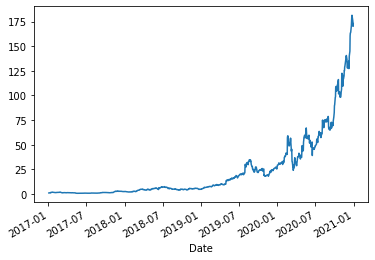

In [40]:
data_eod['ENPH'].plot()

# Extender a poner algun indicador o medida específica...

### Analysis by Sector

Based on a simple mean

In [41]:
Metrics_df.drop(['M_D max_drawdown', 'M_D peak_date', 'M_D peak_price', 'M_D trough_date',  'M_D trough_price'], axis = 1, inplace = True)

Metrics_df.columns = ['Menos volatilidad', 'Mayor rentabilidad anualizada (CAGR)', 'Mejor Sharpe Ratio (vs cetes)', 
                             'Mejor Sortino Ratio (cetes)', 'Min_drawdown', 'Min_log_drawdown', 
                             'Mejor Calmar Ratio', 'Pure-profit', 'Alpha de Jensen']

Metrics_df = Metrics_df.iloc[:, [1,2,3,0, 4, 5, 6, 7, 8]]

Metrics_df.head()

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes),Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio,Pure-profit,Alpha de Jensen
CHRS,-0.110257,-11.095661,-16.714778,0.643920,1.246757,-1.712768,0.385493,-0.002129,-0.001078
FWONK,0.080068,-17.283728,-24.516665,0.402367,0.861270,-0.554018,0.124255,0.007861,-0.000284
FIVN,0.876698,-13.566431,-21.348674,0.453897,0.332923,2.178239,3.330176,0.711228,0.002045
MIK,-0.115604,-8.949959,-13.889492,0.798894,2.945880,-3.435938,-0.207337,-0.087096,-0.001385
GIL,0.038154,-17.781540,-24.542660,0.393459,1.364122,-1.214754,-0.046493,0.003202,-0.000339


In [42]:
sectors = Metrics_df.merge(ticker_yf_data.drop(['previousClose', 'fiftyDayAverage'], axis = 1), how = 'left', left_index = True, right_index = True)
sectors.head()

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes),Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio,Pure-profit,Alpha de Jensen,shortName,marketCap_mill,averageVolume,sharesOutstanding,sector,industry,country
CHRS,-0.110257,-11.095661,-16.714778,0.643920,1.246757,-1.712768,0.385493,-0.002129,-0.001078,"Coherus BioSciences, Inc.",1152.324224,1331151.0,72793696.0,Healthcare,Biotechnology,United States
FWONK,0.080068,-17.283728,-24.516665,0.402367,0.861270,-0.554018,0.124255,0.007861,-0.000284,Liberty Media Corporation - Ser,10127.851520,968601.0,203498000.0,Communication Services,Broadcasting,United States
FIVN,0.876698,-13.566431,-21.348674,0.453897,0.332923,2.178239,3.330176,0.711228,0.002045,"Five9, Inc.",10738.910208,743395.0,65981600.0,Technology,Software—Infrastructure,United States
MIK,-0.115604,-8.949959,-13.889492,0.798894,2.945880,-3.435938,-0.207337,-0.087096,-0.001385,"The Michaels Companies, Inc.",3085.289472,6344786.0,141656992.0,Consumer Cyclical,Specialty Retail,United States
GIL,0.038154,-17.781540,-24.542660,0.393459,1.364122,-1.214754,-0.046493,0.003202,-0.000339,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='sector'>

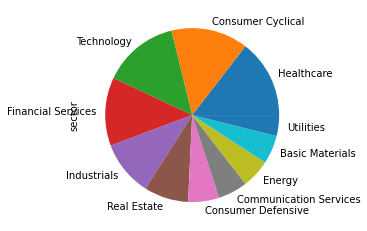

In [43]:
sectors['sector'].value_counts().plot.pie()

In [44]:
sectors.reset_index(inplace = True)

In [45]:
sectors.groupby('sector').mean()

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes),Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio,Pure-profit,Alpha de Jensen,marketCap_mill,averageVolume,sharesOutstanding
sector,,,,,,,,,,,,
Basic Materials,0.109076,-16.462915,-23.899806,0.453262,1.085243,-0.703613,0.161146,0.044181,-1.733863e-04,25005.929208,3.917860e+06,4.834590e+08
Communication Services,0.121300,-18.625182,-26.896384,0.412465,0.935837,-0.546451,0.227392,0.058717,-1.188399e-04,49294.213208,4.744030e+06,7.292486e+08
Consumer Cyclical,0.104198,-15.047805,-22.007298,0.514490,1.366677,-1.028395,0.140815,0.038850,-2.924903e-04,21350.680898,3.434304e+06,2.660579e+08
Consumer Defensive,0.117540,-21.975087,-31.656071,0.354735,0.782193,-0.398147,0.287178,0.072260,7.660604e-07,46500.549627,2.751165e+06,5.865255e+08
Energy,-0.089574,-14.658765,-21.241001,0.550073,1.665186,-2.092019,-0.155335,-0.059594,-1.133384e-03,28596.122997,5.083168e+06,7.501614e+08
Financial Services,0.075221,-19.628308,-28.249853,0.372504,0.845742,-0.584692,0.111777,0.037762,-3.428942e-04,39038.281915,3.064138e+06,5.945630e+08
Healthcare,0.244751,-15.155136,-22.510285,0.549709,1.041161,-0.284838,0.491939,0.136067,2.319451e-04,29407.433737,2.343589e+06,3.669239e+08
Industrials,0.142745,-18.848376,-27.290334,0.401673,0.894899,-0.422929,0.269828,0.080579,-1.257918e-04,27150.960072,3.535147e+06,3.366209e+08
Real Estate,0.027741,-19.727250,-28.010347,0.380817,0.911445,-0.832258,0.075589,0.021739,-4.537229e-04,10942.947362,1.806358e+06,2.128371e+08


### Performance metrics by sector

In [46]:
sectors.groupby('sector').mean().iloc[:, :3].sort_values(by = 'Mayor rentabilidad anualizada (CAGR)', ascending = False)

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes)
sector,,,
Technology,0.283017,-17.217582,-25.090803
Healthcare,0.244751,-15.155136,-22.510285
Industrials,0.142745,-18.848376,-27.290334
Communication Services,0.121300,-18.625182,-26.896384
Consumer Defensive,0.117540,-21.975087,-31.656071
Basic Materials,0.109076,-16.462915,-23.899806
Utilities,0.108030,-24.310557,-34.514801
Consumer Cyclical,0.104198,-15.047805,-22.007298
Financial Services,0.075221,-19.628308,-28.249853


### Volatility metrics

In [47]:
sectors.groupby('sector').mean().iloc[:, 3:7].sort_values(by = 'Menos volatilidad', ascending = False)

,Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio
sector,,,,
Energy,0.550073,1.665186,-2.092019,-0.155335
Healthcare,0.549709,1.041161,-0.284838,0.491939
Consumer Cyclical,0.514490,1.366677,-1.028395,0.140815
Basic Materials,0.453262,1.085243,-0.703613,0.161146
Technology,0.438320,0.822003,0.069703,0.626907
Communication Services,0.412465,0.935837,-0.546451,0.227392
Industrials,0.401673,0.894899,-0.422929,0.269828
Real Estate,0.380817,0.911445,-0.832258,0.075589
Financial Services,0.372504,0.845742,-0.584692,0.111777


## Other

In [48]:
sectors.groupby('sector').mean().iloc[:, 7:9].sort_values(by = 'Alpha de Jensen', ascending = False)

,Pure-profit,Alpha de Jensen
sector,,
Technology,0.170906,2.958044e-04
Healthcare,0.136067,2.319451e-04
Consumer Defensive,0.072260,7.660604e-07
Utilities,0.073153,-2.176036e-05
Communication Services,0.058717,-1.188399e-04
Industrials,0.080579,-1.257918e-04
Basic Materials,0.044181,-1.733863e-04
Consumer Cyclical,0.038850,-2.924903e-04
Financial Services,0.037762,-3.428942e-04


## Top *n*

In [49]:
top_n = 20

to_filter = [('Mayor rentabilidad anualizada (CAGR)', False), ('Mejor Sharpe Ratio (vs cetes)', False), 
             ('Mejor Sortino Ratio (cetes)', False), ('Menos volatilidad', True),
             ('Min_drawdown', True), ('Min_log_drawdown', True), ('Mejor Calmar Ratio', False), 
             ('Pure-profit', False), ('Alpha de Jensen', False)]

i = 0
for f in to_filter:
    sorted_series = Metrics_df[f[0]].sort_values(ascending = f[1]).head(top_n)
    #display(sorted_series)
    if i == 0:
        Metrics_sorted = sorted_series.to_frame()
    else:
        sorted_frame = sorted_series.to_frame()
        Metrics_sorted = Metrics_sorted.merge(sorted_frame, how = 'outer', left_index = True, right_index = True)
    i += 1
    
Metrics_sorted.head(20)

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes),Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio,Pure-profit,Alpha de Jensen
ADS,NaN,NaN,NaN,NaN,NaN,-3.562580,NaN,NaN,NaN
AMD,NaN,NaN,NaN,NaN,NaN,NaN,2.111126,NaN,NaN
AMGN,NaN,NaN,NaN,NaN,0.281486,NaN,NaN,NaN,NaN
APA,NaN,NaN,NaN,NaN,NaN,-4.058616,NaN,NaN,NaN
APPS,2.011188,NaN,NaN,NaN,NaN,NaN,3.752399,0.930616,0.003588
ARCT,NaN,-6.151231,-9.547684,NaN,NaN,NaN,NaN,NaN,NaN
ARWR,1.612413,NaN,NaN,NaN,NaN,NaN,2.446830,1.301277,0.003109
AZN,NaN,NaN,NaN,NaN,0.286058,NaN,NaN,NaN,NaN
BAX,NaN,NaN,NaN,NaN,0.262613,NaN,NaN,NaN,NaN
BCE,NaN,NaN,NaN,0.210356,NaN,NaN,NaN,NaN,NaN


In [50]:
sectors_sorted = Metrics_sorted.merge(ticker_yf_data.drop(['previousClose', 'fiftyDayAverage'], axis = 1), how = 'left', left_index = True, right_index = True)
sectors_sorted.head()

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes),Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio,Pure-profit,Alpha de Jensen,shortName,marketCap_mill,averageVolume,sharesOutstanding,sector,industry,country
ADS,NaN,NaN,NaN,NaN,NaN,-3.562580,NaN,NaN,NaN,Alliance Data Systems Corporati,5155.866624,1047358.0,4.969510e+07,Financial Services,Credit Services,United States
AMD,NaN,NaN,NaN,NaN,NaN,NaN,2.111126,NaN,NaN,"Advanced Micro Devices, Inc.",95112.847360,42582605.0,1.211320e+09,Technology,Semiconductors,United States
AMGN,NaN,NaN,NaN,NaN,0.281486,NaN,NaN,NaN,NaN,Amgen Inc.,131529.105408,2507085.0,5.775660e+08,Healthcare,Drug Manufacturers—General,United States
APA,NaN,NaN,NaN,NaN,NaN,-4.058616,NaN,NaN,NaN,Apache Corporation,8785.267712,9260403.0,3.774780e+08,Energy,Oil & Gas E&P,United States
APPS,2.011188,NaN,NaN,NaN,NaN,NaN,3.752399,0.930616,0.003588,"Digital Turbine, Inc.",6616.606208,3694315.0,8.941360e+07,Technology,Software—Application,United States


Text(0, 0.5, '')

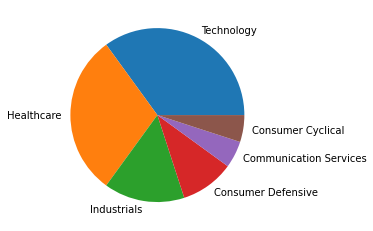

In [51]:
sectors_sorted[sectors_sorted['Mayor rentabilidad anualizada (CAGR)'].notnull()]['sector'].value_counts().plot.pie()
plt.ylabel('')

In [52]:
sectors_sorted.reset_index(inplace = True)

### Performance metrics Top *n*

In [53]:
sectors_sorted.groupby('sector').mean().iloc[:, :3].sort_values(by = 'Mayor rentabilidad anualizada (CAGR)', ascending = False)

,Mayor rentabilidad anualizada (CAGR),Mejor Sharpe Ratio (vs cetes),Mejor Sortino Ratio (cetes)
sector,,,
Technology,1.397847,-4.809068,-8.257888
Healthcare,1.339269,-6.139998,-10.163622
Industrials,1.062614,NaN,NaN
Consumer Cyclical,0.985321,-5.720858,-10.008305
Consumer Defensive,0.942704,NaN,NaN
Communication Services,0.909140,NaN,NaN
Basic Materials,NaN,NaN,NaN
Energy,NaN,-3.277297,-9.554762
Financial Services,NaN,NaN,NaN


### Métricas volatilidad Top *n*

In [54]:
sectors_sorted.groupby('sector').mean().iloc[:, 3:7].sort_values(by = 'Menos volatilidad', ascending = True)

,Menos volatilidad,Min_drawdown,Min_log_drawdown,Mejor Calmar Ratio
sector,,,,
Real Estate,0.156832,0.221967,-4.076381,NaN
Communication Services,0.210844,0.207087,NaN,2.432795
Healthcare,0.212972,0.277290,-4.964389,2.804540
Industrials,0.213721,NaN,-3.946832,2.257306
Consumer Defensive,0.218902,0.254882,NaN,2.075968
Technology,0.224159,0.294380,-4.442184,3.088865
Basic Materials,NaN,NaN,NaN,NaN
Consumer Cyclical,NaN,0.292215,-4.397135,NaN
Energy,NaN,NaN,-4.656571,NaN


In [55]:
sectors_sorted.groupby('sector').mean().iloc[:, 7:9].sort_values(by = 'Alpha de Jensen', ascending = False)

,Pure-profit,Alpha de Jensen
sector,,
Healthcare,1.020764,0.002755
Technology,0.871687,0.002686
Industrials,0.652467,0.002361
Consumer Defensive,0.729922,0.002117
Consumer Cyclical,0.721486,0.002096
Communication Services,0.686344,0.001984
Basic Materials,0.604941,0.001931
Energy,NaN,NaN
Financial Services,NaN,NaN
